In [2]:
import os
import sys
import shutil

from datetime import datetime
from importlib.resources import files

import incito_pipeline.util.data_utility as data_utility
import incito_pipeline.util.dockq_utility as dockq_utility
import incito_pipeline.util.boltz_interface as boltz_interface
from incito_pipeline.util import plotting

import incito_pipeline.util.cache as cache

import numpy as np

DATASET_PATH = files("incito_pipeline.datasets")
CUTOFF_DATE = datetime(2023, 1, 6)

cache_util = cache.Cache()

graph_colours = ['#4c70c4', '#7bac4e', '#d4c04c', '#e377c2', '#8c564b', '#e7c377', '#c7c7c7']


Initialized cache directory: /home/cp864/repos/incito-pipeline/cache


In [2]:
VHHs_model_src_dir = os.path.join(DATASET_PATH, "AF3_independent_test_VHHs_GroundTruth")
VHHs_native_src_dir = os.path.join(DATASET_PATH,"out/PREDICTED_PDB")

Fv_model_src_dir = os.path.join(DATASET_PATH, "AF3_independent_test_Fv_GroundTruth")
Fv_native_src_dir = os.path.join(DATASET_PATH,"out/PREDICTED_PDB")

VHHs_pairs = data_utility.pairs_pdbs(VHHs_model_src_dir, VHHs_native_src_dir)
Fv_pairs = data_utility.pairs_pdbs(Fv_model_src_dir, Fv_native_src_dir)

print(VHHs_pairs)
print(Fv_pairs)

# Get DockQ scores for VHHs
VHHs_mapping_result, VHHs_dockq_result = dockq_utility.dockq(VHHs_pairs, 
                                                             chain_map={'A':'A', 'H':'H'}) 
VHHs_stratized_data = data_utility.stratize_data(VHHs_dockq_result)

# Get DockQ scores for VHHs

# {model -> GroundTruth, native -> Boltz-2 PredictedPDB}
Fv_mapping_result, Fv_dockq_result = dockq_utility.dockq(Fv_pairs, 
                                                         chain_map={'A':'A', 'H':'H', 'L':'L'}) 
Fv_stratized_data = data_utility.stratize_data(Fv_dockq_result)

print(VHHs_stratized_data)
print(Fv_stratized_data)

# Plot the data
print("Plotting data...")
plotting.plot_stacked_bar_chart({"VHHs DockQ Scores":VHHs_stratized_data, "Fv DockQ Scores":Fv_stratized_data}, 
                                colours=graph_colours, 
                                remove_low_cutoff=True,)

plotting.plot_violin_plot({"VHHs DockQ Scores":VHHs_dockq_result, "Fv DockQ Scores":Fv_dockq_result},
                          colours=graph_colours,)


NameError: name 'os' is not defined

Converted /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/BOLTZ_OUT/boltz_results_8c7m_H1-121_L0-107_combined/predictions/8c7m_H1-121_L0-107_combined/8c7m_H1-121_L0-107_combined_model_0.cif to /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/PREDICTED_PDB/8c7m_H1-121_L0-107_combined/8c7m_H1-121_L0-107_combined_model_0.pdb
Converted /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/BOLTZ_OUT/boltz_results_8c7m_H1-121_L0-107_combined/predictions/8c7m_H1-121_L0-107_combined/8c7m_H1-121_L0-107_combined_model_4.cif to /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/PREDICTED_PDB/8c7m_H1-121_L0-107_combined/8c7m_H1-121_L0-107_combined_model_4.pdb
Converted /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/BOLTZ_OUT/boltz_results_8c7m_H1-121_L0-107_combined/predictions/8c7m_H1-121_L0-107_combined/8c7m_H1-121_L0-107_combined_model_8.cif to /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/PREDICTED_PDB/8c7m_H1-1

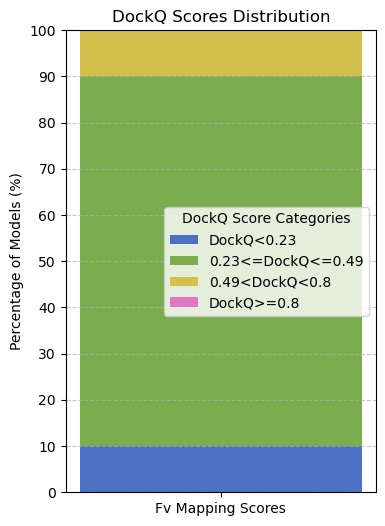

{'Fv Mapping Scores': [0.4409002318967503, 0.4663263749384594, 0.04573618883505623, 0.46981882336165964, 0.4205693209266843, 0.527006472789744, 0.4351198726419412, 0.4440301171968981, 0.40869502248639517, 0.43259761112334694]}
[0.4409002318967503, 0.4663263749384594, 0.04573618883505623, 0.46981882336165964, 0.4205693209266843, 0.527006472789744, 0.4351198726419412, 0.4440301171968981, 0.40869502248639517, 0.43259761112334694]


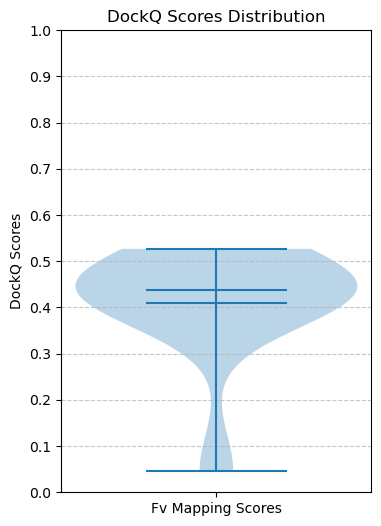

In [ ]:
# SAMPLE TEST

import incito_pipeline.util.parse.pdb


path_to_sample_cif = os.path.join(DATASET_PATH, "out/BOLTZ_OUT/boltz_results_8c7m_H1-121_L0-107_combined/predictions/8c7m_H1-121_L0-107_combined")
path_to_output_pdb = os.path.join(DATASET_PATH, "out/PREDICTED_PDB/8c7m_H1-121_L0-107_combined/")

path_to_ground_truth_pdb = os.path.join(DATASET_PATH, "AF3_independent_test_Fv_GroundTruth/8c7m_H1-121_L0-107.pdb")


files = data_utility.get_file_names(path_to_sample_cif, ".cif")
for f in files:
    cif_path = os.path.join(path_to_sample_cif, f)
    output_file = os.path.join(path_to_output_pdb, f"{f.split('.')[0]}.pdb")
    incito_pipeline.util.parse.pdb.convert_pdb_from_cif(cif_path, output_file)

pairs = data_utility.pairs_pdbs(path_to_ground_truth_pdb, path_to_output_pdb)
print(pairs)
print(path_to_ground_truth_pdb)
print(path_to_output_pdb)

# Plot the sample data
Fv_mapping_result, Fv_dockq_result = dockq_utility.dockq(pairs, 
                                         chain_map={'A':'A', 'H':'H', 'L':'L'})
graph_colours = ['#4c70c4', '#7bac4e', '#d4c04c', '#e377c2', '#8c564b', '#e7c377', '#c7c7c7']


dockQ_scores = [res['AH']['DockQ'] for res in Fv_mapping_result]

stratized_data = data_utility.stratize_data(Fv_dockq_result)

plotting.plot_stacked_bar_chart({"Fv Mapping Scores": stratized_data},
                                 colours=graph_colours,
                                 remove_low_cutoff=False,)

plotting.plot_violin_plot({"Fv Mapping Scores": dockQ_scores},
                                colours=graph_colours,)



In [ ]:

import incito_pipeline.util.parse.fasta


file_names_VHHs = data_utility.get_file_names(
    os.path.join(DATASET_PATH, "AF3_independent_test_VHHs_GroundTruth")
)
file_names_Fv = data_utility.get_file_names(
    os.path.join(DATASET_PATH, "AF3_independent_test_Fv_GroundTruth")
)

merged_paths = data_utility.merge_lists(file_names_VHHs, file_names_Fv)

input_dir_vhhs = os.path.join(DATASET_PATH, "AF3_independent_test_VHHs_GroundTruth")
input_dir_fv = os.path.join(DATASET_PATH, "AF3_independent_test_Fv_GroundTruth")

output_dir_vhhs = os.path.join(DATASET_PATH, "out/FASTAS_VHHs")
output_dir_fv = os.path.join(DATASET_PATH, "out/FASTAS_Fv")

incito_pipeline.util.parse.fasta.build_fastas_from_pdb(input_dir_vhhs, output_dir_vhhs, single_output=False, cutoff_date=CUTOFF_DATE)
incito_pipeline.util.parse.fasta.build_fastas_from_pdb(input_dir_fv, output_dir_fv, single_output=False, cutoff_date=CUTOFF_DATE)

incito_pipeline.util.parse.fasta.build_fastas_from_pdb(input_dir_vhhs, output_dir_vhhs, single_output=True, cutoff_date=CUTOFF_DATE)
incito_pipeline.util.parse.fasta.build_fastas_from_pdb(input_dir_fv, output_dir_fv, single_output=True, cutoff_date=CUTOFF_DATE)

/Users/apple/Documents/summer-internship_ps/incito-pipeline/incito_pipeline/datasets/out/FASTAS_VHHs/8pih_B2-128_NA.pdb
Processing 8pih_B2-128_NA.pdb with date 2023-06-21T00:00:00+0000...
Skipping /Users/apple/Documents/summer-internship_ps/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8pih_B2-128_NA.pdb as it has already been converted to fasta.
/Users/apple/Documents/summer-internship_ps/incito-pipeline/incito_pipeline/datasets/out/FASTAS_VHHs/8f6v_A4-126_NA.pdb
Skipping 8f6v_A4-126_NA.pdb due to cutoff date 2023-01-06 00:00:00.
/Users/apple/Documents/summer-internship_ps/incito-pipeline/incito_pipeline/datasets/out/FASTAS_VHHs/8q6r_A1-119_NA.pdb
Processing 8q6r_A1-119_NA.pdb with date 2023-08-14T00:00:00+0000...
Skipping /Users/apple/Documents/summer-internship_ps/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8q6r_A1-119_NA.pdb as it has already been converted to fasta.
/Users/apple/Documents/summer-internship_ps/inci

In [ ]:
fasta_dir_Fv = f"{os.path.join(DATASET_PATH, 'out/FASTAS')}"
fasta_dir_VHHs = f"{os.path.join(DATASET_PATH, 'out/FASTAS')}"

boltz_output_dir = f"{os.path.join(DATASET_PATH, 'out/BOLTZ_OUT/boltz_results_FASTAS/predictions')}"
output_pdb_dir = f"{os.path.join(DATASET_PATH, 'out/PREDICTED_PDB')}"

bi = boltz_interface.BoltzInterface(boltz_output_dir, output_pdb_dir)


# FASTA files are stored in the following directories
# ├── out
# │   ├── FASTAS_Fv
# │   │   └── (directories with combined, and single FASTA files)
# │   └── FASTAS_VHHs
# │       └── (directories with combined, and single FASTA files)


# Get the directories containing FASTA files for Fv and VHHs
fasta_Fv = data_utility.get_dirs(fasta_dir_Fv)
fasta_VHHs = data_utility.get_dirs(fasta_dir_VHHs)

flags = ['--use_msa_server', '--override', '--accelerator mps']


"""
DEPRECATED -> WILL CHANGE :)

# Boltz predict for multiple FASTA files in the directories
# for Fv nanobodies
for fasta_file in fasta_Fv:
    fasta_file_path = os.path.join(fasta_dir_Fv, fasta_file)
    bi.boltz_predict_multiple(
        fasta_file_dir=fasta_file_path,
        output_dir=boltz_output_dir,
        flags=flags,
        test=True
    )


# for VHHs antibodies
for fasta_file in fasta_VHHs:
    fasta_file_path = os.path.join(fasta_dir_VHHs, fasta_file)
    bi.boltz_predict_multiple(
        fasta_file_dir=fasta_file_path,
        output_dir=boltz_output_dir,
        flags=flags,
        test=True
    )


fasta_file_path = os.path.join(fasta_dir_Fv, fasta_Fv[0])
bi.boltz_predict_multiple(
        fasta_file_dir=fasta_file_path,
        output_dir=boltz_output_dir,
        flags=flags
    )

"""
# Convert Boltz Output files to PDB format
bi.convert_cif_to_pdb_all()


['8qf4_E3-128_NA_combined', '8ybn_B1-131_NA_combined', '9etj_H1-131_NA_combined', '9mic_H1-120_L2-104_combined', '8vk1_C1-123_B1-107_combined', '9bns_A1-123_B1-107_combined', '8tbb_H1-123_L1-108_combined', '8k4q_B1-118_NA_combined', '9fzd_B5-122_NA_combined', '8qgx_B1-123_NA_combined', '8ybl_B1-128_NA_combined', '8tv1_D1-129_E2-107_combined', '8v5l_H1-121_L1-108_combined', '8jqn_H2-118_L4-108_combined', '8rwf_C1-118_NA_combined', '8u1p_B2-122_C2-106_combined', '9bjg_H1-129_L1-108_combined', '9egn_B2-116_NA_combined', '9fvb_C1-121_NA_combined', '8th4_B4-115_NA_combined', '8im1_B4-129_NA_combined', '9eot_B1-123_NA_combined', '9g4g_B1-128_NA_combined', '8k3l_H3-127_NA_combined', '9mnz_C1-118_NA_combined', '9mj3_H2-123_L3-105_combined', '8gjr_A4-120_NA_combined', '8r4n_H1-126_L1-111_combined', '8y31_B1-119_A1-112_combined', '8tui_H3-125_L1-108_combined', '8u4r_H1-125_L1-111_combined', '8tuz_H1-122_L3-110_combined', '8zu9_B1-123_A1-108_combined', '9cmi_H27-153_L26-133_combined', '8tfl_H1-12

In [ ]:



VHHs_model_src_dir = os.path.join(DATASET_PATH, "AF3_independent_test_VHHs_GroundTruth")
VHHs_native_src_dir = os.path.join(DATASET_PATH,"out/PREDICTED_PDB")

Fv_model_src_dir = os.path.join(DATASET_PATH, "AF3_independent_test_Fv_GroundTruth")
Fv_native_src_dir = os.path.join(DATASET_PATH,"out/PREDICTED_PDB")

cache_file_vhhs = "dockq_scores_vhhs"
cache_file_fv = "dockq_scores_fv"

if not cache_util.is_pickle(cache_file_vhhs) or not cache_util.is_pickle(cache_file_fv):
    dockQ_scores_VHHs = dockq_utility.get_boltz_scores_multiple_predictions(VHHs_model_src_dir, VHHs_native_src_dir, {'A':'A', 'H':'H'})
    dockQ_scores_Fv = dockq_utility.get_boltz_scores_multiple_predictions(Fv_model_src_dir, Fv_native_src_dir, {'A':'A', 'H':'H', 'L':'L'})

    cache_util.save_pickle(dockQ_scores_VHHs, cache_file_vhhs)
    cache_util.save_pickle(dockQ_scores_Fv, cache_file_fv)
else:
    dockQ_scores_VHHs = cache_util.load_pickle(cache_file_vhhs)
    dockQ_scores_Fv = cache_util.load_pickle(cache_file_fv)

def get_avgs(dockQ_scores):
    avg_scores = {}
    for key, value in dockQ_scores.items():
        scores_sum = np.sum(value)
        avg = scores_sum / len(value)
        if avg in avg_scores:
            print(f"Duplicate average DockQ score found for {avg}, overwriting with new value.")
        avg_scores[avg] = key
    return avg_scores
def get_spaced_scores(dockQ_scores, nums=10):
    keys = list(dockQ_scores.keys())
    keys.sort()

    indicies = np.linspace(1, len(keys) - 1, nums).astype(int)
    return [dockQ_scores[keys[i]] for i in indicies]

def copy_files(file_names, src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for file_name in file_names:
        src_file = os.path.join(src_dir, f"{file_name}.pdb")
        dest_file = os.path.join(dest_dir, f"{file_name}.pdb")
        if os.path.exists(src_file):
            shutil.copy(src_file, dest_file)
        else:
            print(f"File {src_file} does not exist, skipping.")

avg_dockq_scores_VHHs = get_avgs(dockQ_scores_VHHs)
avg_dockq_scores_Fv = get_avgs(dockQ_scores_Fv)

avg_dockq_scores_total = (avg_dockq_scores_VHHs)
avg_dockq_scores_total.update(avg_dockq_scores_Fv)

sort_dockq = dict(sorted(avg_dockq_scores_total.items()))
smallest_dockq = min(sort_dockq.keys())
largest_dockq = max(sort_dockq.keys())


spaced_vhhs = get_spaced_scores(avg_dockq_scores_VHHs)
spaced_fv = get_spaced_scores(avg_dockq_scores_Fv)

copy_files(spaced_vhhs, VHHs_model_src_dir, os.path.join(DATASET_PATH, "samplee/VHHs"))
copy_files(spaced_fv, Fv_model_src_dir, os.path.join(DATASET_PATH, "spaced_out/Fv"))

print(sort_dockq[smallest_dockq], sort_dockq[largest_dockq])
print(spaced_vhhs, spaced_fv)





"""
# Get DockQ scores by selecting via Boltz-2 confidence output

VHHs_dockq_by_confidence = np.array(pick_boltz_by_confidence(VHHs_model_src_dir, {'A':'A', 'H':'H'}))
Fv_dockq_by_confidence = np.array(pick_boltz_by_confidence(Fv_model_src_dir, {'A':'A', 'H':'H', 'L':'L'}))

merged_confidence_dockq_scores =  np.concatenate((VHHs_dockq_by_confidence, Fv_dockq_by_confidence))
merged_confidence_stratized_data = data_utility.stratize_data(merged_confidence_dockq_scores)

# Get DockQ scores by selecting the best DockQ score from Boltz-2 output

VHHs_dockq_scores, VHHs_corresponding_files = dockq_utility.pick_dockq_score(VHHs_model_src_dir, {'A':'A', 'H':'H'})
Fv_dockq_scores, Fv_corresponding_files = dockq_utility.pick_dockq_score(Fv_model_src_dir, {'A':'A', 'H':'H', 'L':'L'})

merged_dockq_scores =  np.concatenate((np.array(VHHs_dockq_scores), np.array(Fv_dockq_scores)))
merged_stratized_data = data_utility.stratize_data(merged_dockq_scores)


# Plot the data
plotting.plot_stacked_bar_chart({"Boltz-2 Picked": merged_confidence_stratized_data, 
                                 "Best": merged_stratized_data},
                                colours=graph_colours,
                                remove_low_cutoff=True,
                                title="DockQ Scores by Boltz-2 IPTM vs Best DockQ Scores",
                                legend_title="DockQ Categories",)
plotting.plot_violin_plot({"Boltz-2 Picked": merged_confidence_dockq_scores, 
                           "Best": merged_dockq_scores},
                          colours=graph_colours,
                          title="DockQ Scores by Boltz-2 IPTM vs Best DockQ Scores",)
"""

File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8xk5_A1-125_B2-108.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8yx1_A0-119_B1-107.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8vrs_C262-384_C149-261.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8ruu_B1-125_C1-108.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8slb_H4-132_L2-109.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8y31_B1-119_A1-112.pdb does not exist, skipping.
File /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_

'\n# Get DockQ scores by selecting via Boltz-2 confidence output\n\nVHHs_dockq_by_confidence = np.array(pick_boltz_by_confidence(VHHs_model_src_dir, {\'A\':\'A\', \'H\':\'H\'}))\nFv_dockq_by_confidence = np.array(pick_boltz_by_confidence(Fv_model_src_dir, {\'A\':\'A\', \'H\':\'H\', \'L\':\'L\'}))\n\nmerged_confidence_dockq_scores =  np.concatenate((VHHs_dockq_by_confidence, Fv_dockq_by_confidence))\nmerged_confidence_stratized_data = data_utility.stratize_data(merged_confidence_dockq_scores)\n\n# Get DockQ scores by selecting the best DockQ score from Boltz-2 output\n\nVHHs_dockq_scores, VHHs_corresponding_files = dockq_utility.pick_dockq_score(VHHs_model_src_dir, {\'A\':\'A\', \'H\':\'H\'})\nFv_dockq_scores, Fv_corresponding_files = dockq_utility.pick_dockq_score(Fv_model_src_dir, {\'A\':\'A\', \'H\':\'H\', \'L\':\'L\'})\n\nmerged_dockq_scores =  np.concatenate((np.array(VHHs_dockq_scores), np.array(Fv_dockq_scores)))\nmerged_stratized_data = data_utility.stratize_data(merged_dockq_sc

In [1]:
import os
from importlib.resources import files
import incito_pipeline.util.dockq_utility as dockq_utility

import incito_pipeline.util.parse.pdb as pdb_parse

DATASET_PATH = files("incito_pipeline.datasets")

pdb_parse.convert_pdb_from_cif_nested(os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions"), 
                                      os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/"))



/spinning1/scratch/cp864/miniforge3/envs/incito-pipeline/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions
/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/
/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9cq8_C1-121_E1-106_fv_combined/9cq8_C1-121_E1-106_fv_combined_model_42.cif
/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/9cq8_C1-121_E1-106_fv/9cq8_C1-121_E1-106_fv_combined_model_42.pdb
Converted /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9cq8_C1-121_E1-106_fv_combined/9cq8_C1-121_E1-106_fv_combined_model_42.cif to /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/9cq8_C1-121_E1

In [ ]:
import os
from importlib.resources import files
import incito_pipeline.util.dockq_utility as dockq_utility
import incito_pipeline.util.data_utility as data_utility
import incito_pipeline.util.plotting as plotting

import incito_pipeline.util.parse.pdb as pdb_parse

DATASET_PATH = files("incito_pipeline.datasets")

pdb_parse.convert_pdb_from_cif_nested(os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas"), 
                                      os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/"))


ground_truth_dir = os.path.join(DATASET_PATH, "out/sample_run_20/sample_pdb/")
no_template_src_dir = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/")
boltz_output_dir = os.path.join(DATASET_PATH,"out/sample_run_20/boltz_output/boltz_results_sample_fastas")

dockq_scores_no_template = dockq_utility.pick_boltz_by_confidence(
    ground_truth_dir=ground_truth_dir, 
    predicted_pdb_dir=no_template_src_dir, 
    boltz_output_dir=boltz_output_dir, 
    chain_map=None)
print(dockq_scores_no_template)

stratized_no_template = data_utility.stratize_data(dockq_scores_no_template)

plotting.plot_stacked_bar_chart({"100 seeds, no template": stratized_no_template},
                                remove_low_cutoff=True,
                                title="DockQ Scores, selected by confidence Boltz-2 IPTM",
                                legend_title="DockQ Categories",)





/spinning1/scratch/cp864/miniforge3/envs/incito-pipeline/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas
/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output_converted_pdbs/no_template_pdbs/
/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/sample_pdb/9mj3_H2-123_L3-105_vhhs.pdb /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9mj3_H2-123_L3-105_vhhs_combined
Picked: 9mj3_H2-123_L3-105_vhhs_combined_model_6, 0.953681468963623
Getting PDB models for comparison.
Extracting chain map from: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/sample_pdb/9mj3_H2-123_L3-105_vhhs.pdb

DockQ result for 9mj3_H2-123_L3-105_vhhs.pdb: Total DockQ: 2.165292350481301, {'HL': {'DockQ': 0.7900273381918841, 'F1': 0.8686868686868687, 'iRMSD': 1.263147244868641, 'LRMSD': 1.7783038205689576, 'fnat': 0.8269230769230769, 'nat_co

TypeError: float() argument must be a string or a real number, not 'list'

Extracted {'/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9mj3_H2-123_L3-105_vhhs_combined/confidence_9mj3_H2-123_L3-105_vhhs_combined_model_5.json': 0.9188892841339111, '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9mj3_H2-123_L3-105_vhhs_combined/confidence_9mj3_H2-123_L3-105_vhhs_combined_model_34.json': 0.9193083047866821, '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9mj3_H2-123_L3-105_vhhs_combined/confidence_9mj3_H2-123_L3-105_vhhs_combined_model_52.json': 0.9162202477455139, '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions/9mj3_H2-123_L3-105_vhhs_combined/confidence_9mj3_H2-123_L3-105_vhhs_combined_model_25.json': 0.9201990365982056, '/home/cp864/r

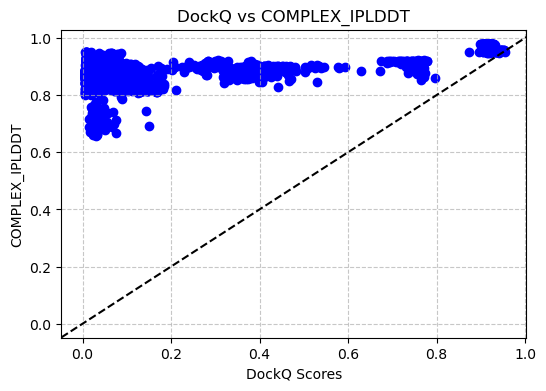

(0.9188892841339111, 0.9193083047866821, 0.9162202477455139, 0.9201990365982056, 0.918556809425354, 0.8740289807319641, 0.9197714924812317, 0.9133209586143494, 0.9160232543945312, 0.8852596282958984, 0.9192503690719604, 0.8543605804443359, 0.9193935394287109, 0.912578821182251, 0.9146741032600403, 0.8746276497840881, 0.9059954881668091, 0.9136282205581665, 0.871736466884613, 0.9130668640136719, 0.9146239757537842, 0.9192429184913635, 0.9190351963043213, 0.9152093529701233, 0.9204134345054626, 0.9172235131263733, 0.9168487787246704, 0.86381995677948, 0.9204012155532837, 0.9183346629142761, 0.907855749130249, 0.8759638667106628, 0.9234937429428101, 0.9125111103057861, 0.9197607040405273, 0.8956560492515564, 0.9172054529190063, 0.9201152920722961, 0.9187387228012085, 0.9197254180908203, 0.8763666749000549, 0.9191240668296814, 0.9173869490623474, 0.9179200530052185, 0.8953152298927307, 0.9203968048095703, 0.8833758234977722, 0.918080747127533, 0.916277289390564, 0.9150119423866272, 0.91875

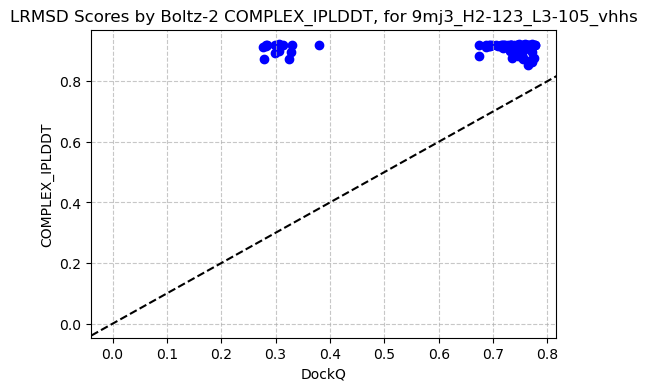

(0.8810489773750305, 0.833062469959259, 0.9067175388336182, 0.8046470284461975, 0.8782877326011658, 0.8438354730606079, 0.8399165868759155, 0.8746188879013062, 0.8367672562599182, 0.8420082330703735, 0.8960002064704895, 0.8258587718009949, 0.8998352289199829, 0.884730339050293, 0.8946335315704346, 0.8732718229293823, 0.8715444207191467, 0.8785606622695923, 0.8824759721755981, 0.8367029428482056, 0.8424054384231567, 0.8933655619621277, 0.8337832093238831, 0.8515562415122986, 0.8767379522323608, 0.8316049575805664, 0.9244281053543091, 0.917919397354126, 0.9099119901657104, 0.8830795288085938, 0.8355400562286377, 0.8880156874656677, 0.8127438426017761, 0.9004123210906982, 0.8383631110191345, 0.8935938477516174, 0.8919064402580261, 0.8693162798881531, 0.8802716135978699, 0.8674733638763428, 0.9191911816596985, 0.8845337629318237, 0.8868340253829956, 0.8686845898628235, 0.8321994543075562, 0.8395327925682068, 0.9177617430686951, 0.8405945897102356, 0.8863111734390259, 0.8864874839782715, 0.

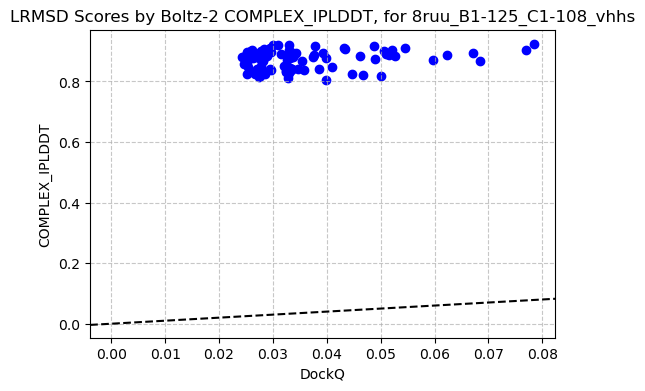

(0.910896897315979, 0.9070745706558228, 0.9346160292625427, 0.9331997632980347, 0.877351701259613, 0.9181345105171204, 0.9243737459182739, 0.8822600245475769, 0.9106982350349426, 0.945124626159668, 0.9070178866386414, 0.9519008994102478, 0.9143776893615723, 0.9174440503120422, 0.9222105145454407, 0.9412041902542114, 0.9502050876617432, 0.9248540997505188, 0.9067137241363525, 0.8849929571151733, 0.9207446575164795, 0.9487878680229187, 0.874764084815979, 0.9158160090446472, 0.9218114614486694, 0.9286559820175171, 0.9448873996734619, 0.8920841217041016, 0.9226263761520386, 0.9497506022453308, 0.9151298403739929, 0.919583797454834, 0.9173080325126648, 0.9235248565673828, 0.906366765499115, 0.918073832988739, 0.903961181640625, 0.9093006253242493, 0.9312517046928406, 0.9445489048957825, 0.9024848937988281, 0.9312241673469543, 0.915245532989502, 0.9421725273132324, 0.9205508232116699, 0.9490911960601807, 0.9450162649154663, 0.9303205609321594, 0.9453902840614319, 0.9138038754463196, 0.922114

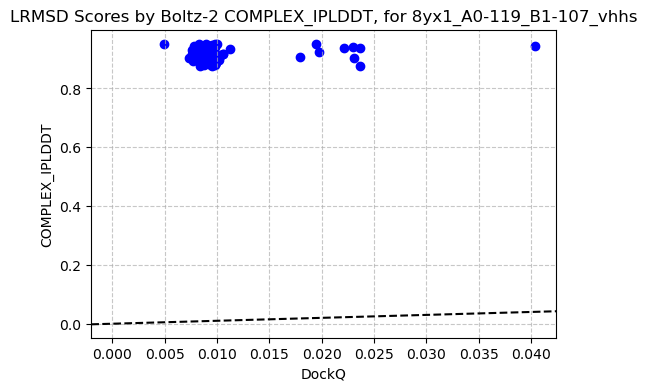

(0.9044162631034851, 0.8831470608711243, 0.8982545733451843, 0.9015170931816101, 0.8598517775535583, 0.9018785357475281, 0.9028217792510986, 0.9001884460449219, 0.8820900917053223, 0.8967841267585754, 0.9027477502822876, 0.8493784070014954, 0.8296214938163757, 0.9026508331298828, 0.8953502178192139, 0.8951144814491272, 0.8982996344566345, 0.84639972448349, 0.9015745520591736, 0.865119457244873, 0.8966200947761536, 0.8851597309112549, 0.8971441984176636, 0.8986799716949463, 0.9028729200363159, 0.9015185832977295, 0.8943041563034058, 0.8973333835601807, 0.8930692076683044, 0.8574755191802979, 0.89607834815979, 0.8857330679893494, 0.8892034292221069, 0.9000157117843628, 0.9049493670463562, 0.9002509117126465, 0.9019137620925903, 0.8974406123161316, 0.8977036476135254, 0.8938393592834473, 0.9028406143188477, 0.8964760899543762, 0.9018698334693909, 0.897027313709259, 0.9004756808280945, 0.8951961994171143, 0.9032756090164185, 0.9030800461769104, 0.8988136649131775, 0.8967759013175964, 0.893

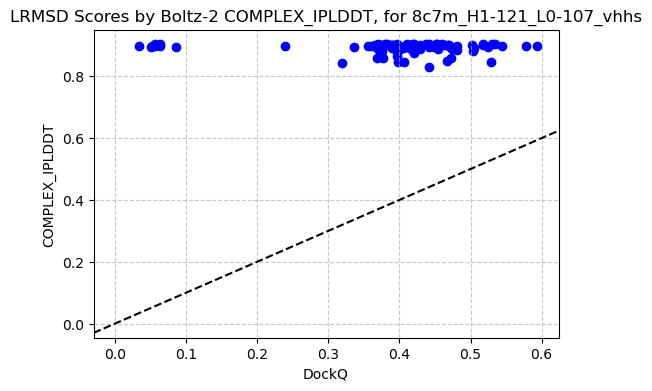

(0.8653261661529541, 0.8711161017417908, 0.8640567660331726, 0.8789186477661133, 0.832490086555481, 0.8524304628372192, 0.8847339153289795, 0.8565325736999512, 0.8753899931907654, 0.8874884247779846, 0.8708234429359436, 0.8462590575218201, 0.8389521837234497, 0.879263699054718, 0.8708567023277283, 0.8731904029846191, 0.837815523147583, 0.8714661002159119, 0.8534263968467712, 0.8857628107070923, 0.8532019853591919, 0.8664699792861938, 0.8646580576896667, 0.895258903503418, 0.8918496966362, 0.871860146522522, 0.8602854609489441, 0.8750395774841309, 0.8770323395729065, 0.8851825594902039, 0.8514893651008606, 0.865738034248352, 0.8734467625617981, 0.8451511263847351, 0.8678533434867859, 0.8534325361251831, 0.8822428584098816, 0.8685758113861084, 0.8604342937469482, 0.8808340430259705, 0.8476635217666626, 0.8894316554069519, 0.8722906708717346, 0.8314216136932373, 0.8866498470306396, 0.8563235998153687, 0.8584663271903992, 0.8862265944480896, 0.8727249503135681, 0.8677269220352173, 0.872587

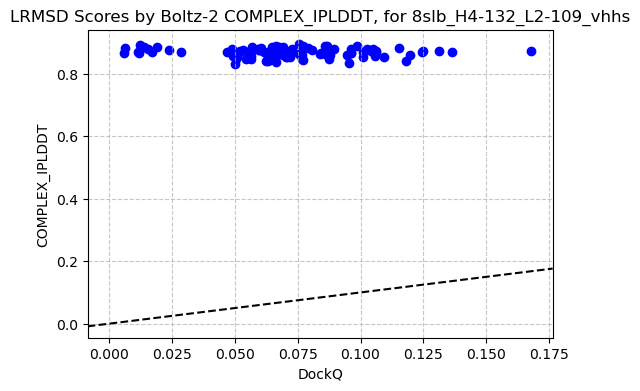

(0.8862133026123047, 0.8957940340042114, 0.8968521356582642, 0.9125387072563171, 0.8848901391029358, 0.8824692368507385, 0.8816160559654236, 0.8720101118087769, 0.888255774974823, 0.8911023736000061, 0.8882668018341064, 0.8921329975128174, 0.9020550847053528, 0.865606427192688, 0.9035648703575134, 0.8803480863571167, 0.8769094347953796, 0.8921093344688416, 0.8986741900444031, 0.8890490531921387, 0.890850841999054, 0.8995434641838074, 0.8853007555007935, 0.9003899097442627, 0.8995739817619324, 0.8980326652526855, 0.8891207575798035, 0.8953908681869507, 0.8916339874267578, 0.8869386315345764, 0.8656333088874817, 0.8855551481246948, 0.9086014628410339, 0.8825777173042297, 0.8640557527542114, 0.8930953741073608, 0.9161458611488342, 0.8836628794670105, 0.8715287446975708, 0.8950223922729492, 0.8953896164894104, 0.8747891187667847, 0.8810972571372986, 0.8694707751274109, 0.8875725269317627, 0.9171411395072937, 0.8728732466697693, 0.8796709775924683, 0.8833175897598267, 0.8828608989715576, 0.

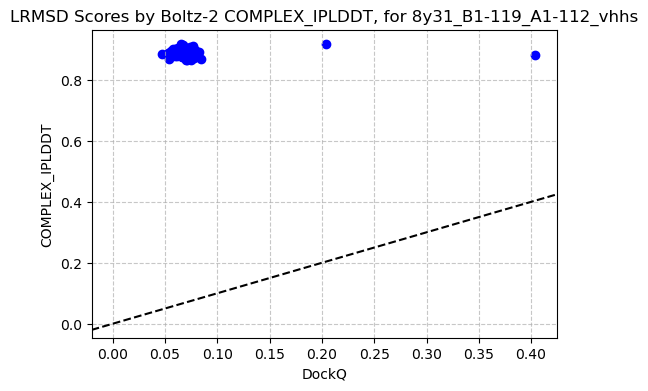

(0.828374981880188, 0.8436561226844788, 0.8484184741973877, 0.8201197981834412, 0.839975893497467, 0.810295820236206, 0.8334647417068481, 0.8220173716545105, 0.8090799450874329, 0.8287903070449829, 0.811549186706543, 0.8196746706962585, 0.8112679123878479, 0.8136870265007019, 0.8360267877578735, 0.8211854696273804, 0.8405567407608032, 0.8303568363189697, 0.8281575441360474, 0.8304846286773682, 0.8238004446029663, 0.8185333013534546, 0.8152466416358948, 0.8332054018974304, 0.8456650376319885, 0.8260900974273682, 0.8279132843017578, 0.8229215145111084, 0.856191098690033, 0.8192967176437378, 0.8198139667510986, 0.8198893666267395, 0.8328954577445984, 0.7925392985343933, 0.8236046433448792, 0.8281412124633789, 0.8150960803031921, 0.8215218186378479, 0.8156286478042603, 0.8250565528869629, 0.8329382538795471, 0.8156954646110535, 0.818754255771637, 0.8232247233390808, 0.821750819683075, 0.8211960792541504, 0.8214443325996399, 0.8202829360961914, 0.8153405785560608, 0.8463728427886963, 0.8170

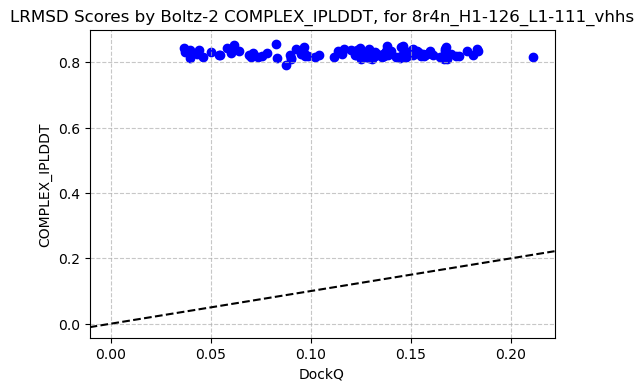

(0.8398611545562744, 0.8216679692268372, 0.810278058052063, 0.8452616333961487, 0.8615231513977051, 0.8668602705001831, 0.8632521629333496, 0.8448609113693237, 0.8610543608665466, 0.8765980005264282, 0.8697363138198853, 0.8708909749984741, 0.8697635531425476, 0.8672595620155334, 0.8640385270118713, 0.8437437415122986, 0.8624525666236877, 0.8575725555419922, 0.8383140563964844, 0.8466231822967529, 0.8236079216003418, 0.8718641400337219, 0.8678011894226074, 0.8746756911277771, 0.8568638563156128, 0.8714472055435181, 0.8584644198417664, 0.867173433303833, 0.8386093378067017, 0.8687083125114441, 0.8110950589179993, 0.8643669486045837, 0.8748965263366699, 0.8652268052101135, 0.8679489493370056, 0.811879575252533, 0.8628824353218079, 0.857445478439331, 0.8385345339775085, 0.8743848204612732, 0.8615595698356628, 0.8698315620422363, 0.8777260780334473, 0.8671154379844666, 0.8007329702377319, 0.8642574548721313, 0.8672350645065308, 0.8375134468078613, 0.8701473474502563, 0.8669532537460327, 0.8

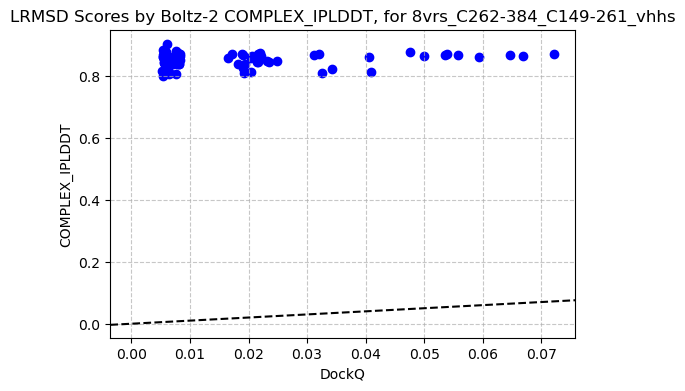

(0.9786579012870789, 0.9787817597389221, 0.9792768955230713, 0.9779802560806274, 0.9770913124084473, 0.9793339371681213, 0.976852297782898, 0.9790342450141907, 0.9797179102897644, 0.9790868759155273, 0.9793218970298767, 0.9791470766067505, 0.9793242812156677, 0.979227602481842, 0.9793426394462585, 0.9784340262413025, 0.9784510731697083, 0.9790315628051758, 0.977683961391449, 0.9784501791000366, 0.9787273406982422, 0.9793810844421387, 0.9785336852073669, 0.9787113070487976, 0.9787695407867432, 0.9790949821472168, 0.9787912368774414, 0.978858232498169, 0.9790995121002197, 0.9792114496231079, 0.9786474704742432, 0.9791802763938904, 0.9776374101638794, 0.9787154793739319, 0.9785434007644653, 0.9779041409492493, 0.9786912202835083, 0.9783738255500793, 0.9791545867919922, 0.9792266488075256, 0.9787600636482239, 0.9773894548416138, 0.9790458679199219, 0.9781976938247681, 0.9777759909629822, 0.9796802997589111, 0.9794371128082275, 0.9780579209327698, 0.9791973233222961, 0.9787583351135254, 0.9

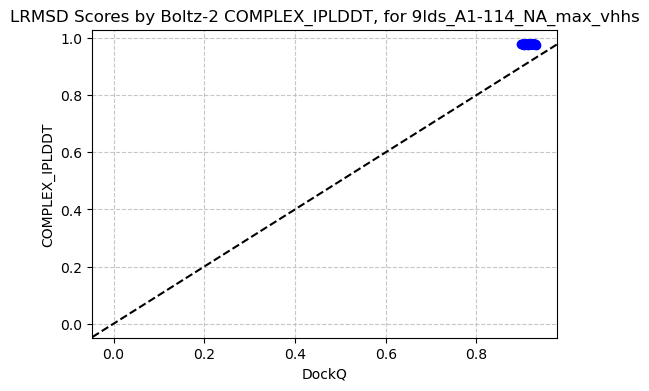

(0.9530647397041321, 0.9560181498527527, 0.9555945992469788, 0.9526998996734619, 0.9519458413124084, 0.9575182795524597, 0.9521013498306274, 0.956939160823822, 0.9489622116088867, 0.9586090445518494, 0.953345000743866, 0.953943133354187, 0.9524402618408203, 0.9565942883491516, 0.9473493695259094, 0.9540390372276306, 0.9504818916320801, 0.9514092206954956, 0.9580063819885254, 0.9511824250221252, 0.9561810493469238, 0.9497641324996948, 0.9577085971832275, 0.9571405053138733, 0.9507450461387634, 0.9510897397994995, 0.9555051922798157, 0.9571649432182312, 0.9549604058265686, 0.9530962705612183, 0.9596246480941772, 0.9542456865310669, 0.9591332077980042, 0.9562098979949951, 0.9584259390830994, 0.9575209617614746, 0.9555208086967468, 0.9553941488265991, 0.9498276114463806, 0.9565027952194214, 0.9552237391471863, 0.9514839053153992, 0.9562724828720093, 0.9480264186859131, 0.9516929388046265, 0.9538928866386414, 0.9508223533630371, 0.95469731092453, 0.9565910696983337, 0.9486424326896667, 0.95

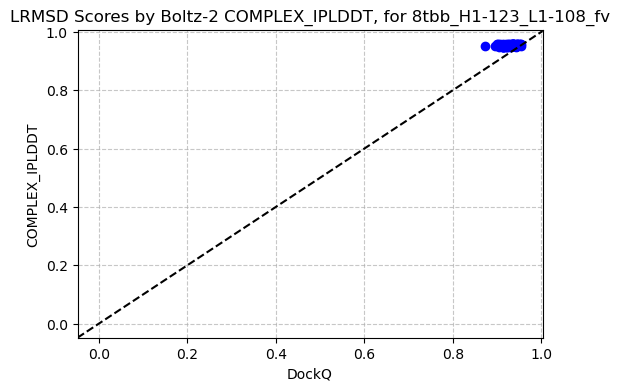

(0.8505728840827942, 0.8876221179962158, 0.895387589931488, 0.8634830117225647, 0.8865358233451843, 0.8793771266937256, 0.8876425623893738, 0.8838122487068176, 0.8782340288162231, 0.8549497127532959, 0.8879004120826721, 0.892335057258606, 0.8852841854095459, 0.86589115858078, 0.9364376664161682, 0.8822833895683289, 0.8705184459686279, 0.903434157371521, 0.8904138803482056, 0.8869739174842834, 0.8904917240142822, 0.8561229109764099, 0.83719402551651, 0.8659041523933411, 0.9008455872535706, 0.8906664848327637, 0.8885111808776855, 0.8831408619880676, 0.8691413998603821, 0.8930792212486267, 0.8827694058418274, 0.8881994485855103, 0.8991998434066772, 0.8718075752258301, 0.8834235072135925, 0.8824984431266785, 0.8975304365158081, 0.8783947229385376, 0.8798767924308777, 0.9021214246749878, 0.8827258348464966, 0.8524369597434998, 0.8872029185295105, 0.8897721171379089, 0.8696480393409729, 0.8599880337715149, 0.8876512050628662, 0.8767216205596924, 0.873660683631897, 0.8613250851631165, 0.89223

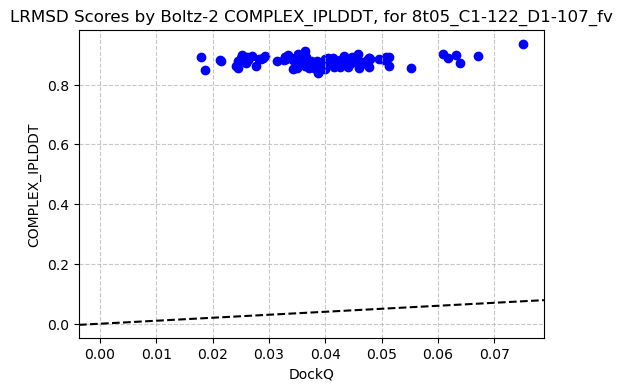

(0.893255889415741, 0.8889263868331909, 0.8914378881454468, 0.8978504538536072, 0.9131304025650024, 0.9047943353652954, 0.8920137882232666, 0.9012537598609924, 0.8855650424957275, 0.8937325477600098, 0.8976960778236389, 0.8906814455986023, 0.8965283036231995, 0.8877567648887634, 0.8800821900367737, 0.8777118921279907, 0.9007201194763184, 0.9043282270431519, 0.8881143927574158, 0.9172095656394958, 0.9019132852554321, 0.8965224027633667, 0.8929309248924255, 0.9042985439300537, 0.8913164734840393, 0.9057693481445312, 0.8930341005325317, 0.9060207605361938, 0.9003213047981262, 0.8962761759757996, 0.9038393497467041, 0.8967959880828857, 0.8884559273719788, 0.8886393308639526, 0.8973657488822937, 0.8931726217269897, 0.8980755805969238, 0.8953494429588318, 0.8963156938552856, 0.8963791728019714, 0.9004598259925842, 0.9080150127410889, 0.8872284889221191, 0.9008132815361023, 0.8949797749519348, 0.8994194865226746, 0.8868297934532166, 0.8930368423461914, 0.8982738256454468, 0.8915205597877502, 

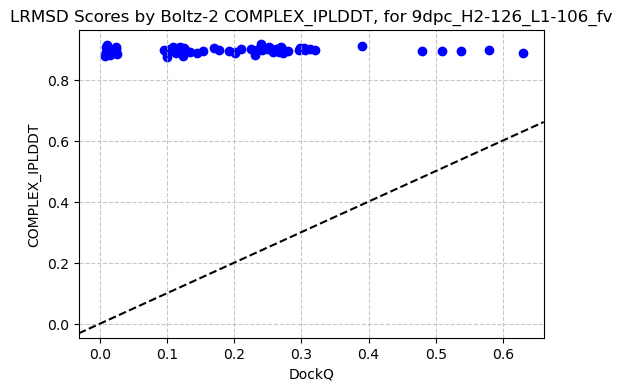

(0.8667531609535217, 0.8672532439231873, 0.8675753474235535, 0.8613942861557007, 0.8809674382209778, 0.8601147532463074, 0.8636226654052734, 0.8830662965774536, 0.8690395355224609, 0.8651272654533386, 0.8999274373054504, 0.8682482242584229, 0.8564971089363098, 0.8750889301300049, 0.8658509850502014, 0.8626150488853455, 0.861130952835083, 0.8656920194625854, 0.8669803142547607, 0.8700268268585205, 0.8839792013168335, 0.8630329966545105, 0.8756568431854248, 0.8701841831207275, 0.8650039434432983, 0.8615807890892029, 0.8747578859329224, 0.8690518736839294, 0.8672086596488953, 0.8643619418144226, 0.8617212772369385, 0.8778924942016602, 0.8651151061058044, 0.8647473454475403, 0.8642913699150085, 0.8607259392738342, 0.8661988973617554, 0.8654250502586365, 0.8672835230827332, 0.8709473013877869, 0.8704255819320679, 0.8741984367370605, 0.8510925769805908, 0.8587846755981445, 0.8493686318397522, 0.8800842761993408, 0.863577663898468, 0.8725133538246155, 0.8611975908279419, 0.8573818206787109, 0

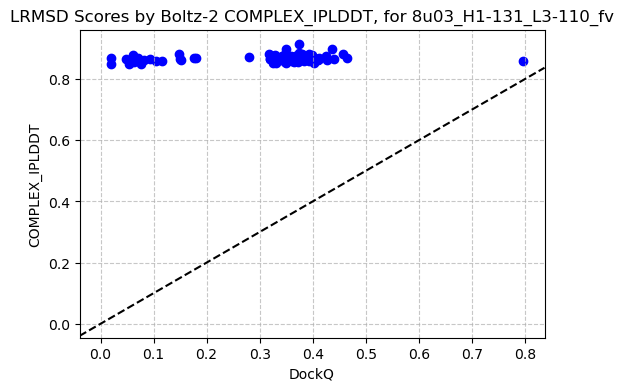

(0.6927844285964966, 0.67936772108078, 0.6882710456848145, 0.7166100740432739, 0.7417334914207458, 0.7053942680358887, 0.7509499192237854, 0.667043149471283, 0.6595110297203064, 0.7044378519058228, 0.7701840400695801, 0.7572404742240906, 0.6726706624031067, 0.7022077441215515, 0.6887298226356506, 0.697441041469574, 0.6557157635688782, 0.6935363411903381, 0.7164889574050903, 0.7848266959190369, 0.7168129086494446, 0.7228562235832214, 0.7185109257698059, 0.754073977470398, 0.6893973350524902, 0.6616345047950745, 0.6987224221229553, 0.6779811978340149, 0.6667724847793579, 0.7434095740318298, 0.7564284205436707, 0.6864351034164429, 0.7822290658950806, 0.6982448101043701, 0.7036060094833374, 0.670774519443512, 0.6886402368545532, 0.7139341235160828, 0.676604688167572, 0.7070438265800476, 0.7387132048606873, 0.7361428141593933, 0.7483165264129639, 0.7159596681594849, 0.6873641014099121, 0.6869006752967834, 0.7995898723602295, 0.7554640769958496, 0.7257124781608582, 0.751032292842865, 0.70262

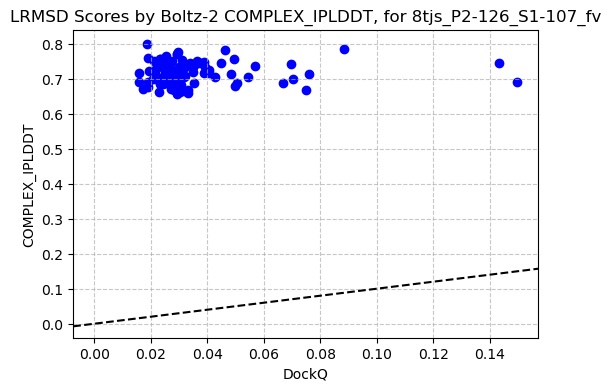

(0.8549196124076843, 0.8903021216392517, 0.8804130554199219, 0.9021140933036804, 0.9436129927635193, 0.8547334671020508, 0.9440241456031799, 0.9480611681938171, 0.8628684282302856, 0.941989541053772, 0.9386103749275208, 0.8762806057929993, 0.9478061199188232, 0.8960837721824646, 0.9479181170463562, 0.9174870252609253, 0.9450916051864624, 0.9027938842773438, 0.8760439157485962, 0.914246141910553, 0.9253078699111938, 0.8485602140426636, 0.9290635585784912, 0.8843432068824768, 0.8603211045265198, 0.9438126683235168, 0.8869032263755798, 0.9245657920837402, 0.9364972114562988, 0.93962162733078, 0.9222320914268494, 0.9029620289802551, 0.8553937673568726, 0.8840067982673645, 0.8977381587028503, 0.8631476163864136, 0.9222736954689026, 0.8759331107139587, 0.8811659216880798, 0.9175971150398254, 0.8606687784194946, 0.9115800261497498, 0.918562114238739, 0.8883824348449707, 0.9452221393585205, 0.9058680534362793, 0.9010148048400879, 0.8737384676933289, 0.9467546343803406, 0.9459245204925537, 0.86

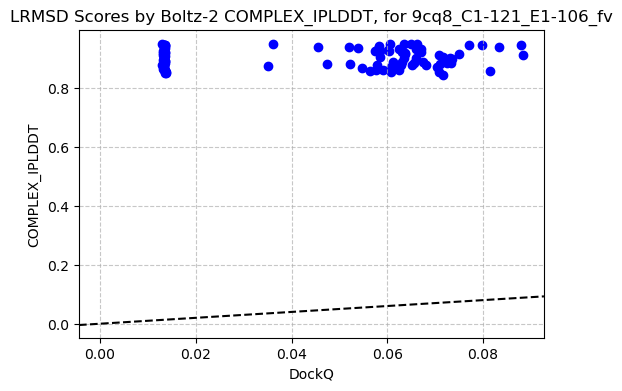

(0.842317521572113, 0.8323363661766052, 0.8432973623275757, 0.842680811882019, 0.8378875851631165, 0.8335557579994202, 0.8366804122924805, 0.8276770114898682, 0.8260327577590942, 0.8378652930259705, 0.8342800140380859, 0.8413918018341064, 0.858327329158783, 0.8260396122932434, 0.8316375017166138, 0.8285201191902161, 0.8327262997627258, 0.8208014965057373, 0.8394298553466797, 0.8214079737663269, 0.8329290151596069, 0.8355533480644226, 0.8196113109588623, 0.8142611980438232, 0.8237053155899048, 0.8427383303642273, 0.8182558417320251, 0.8324303030967712, 0.8384454846382141, 0.8434575200080872, 0.8347697854042053, 0.8393984436988831, 0.860892117023468, 0.8324167728424072, 0.8206630945205688, 0.8216411471366882, 0.834047794342041, 0.8413125872612, 0.8172749876976013, 0.8454537391662598, 0.8269726634025574, 0.8376705050468445, 0.8329830169677734, 0.8318005204200745, 0.8248043656349182, 0.8196489214897156, 0.8320332169532776, 0.8296999335289001, 0.818628191947937, 0.8502597212791443, 0.843013

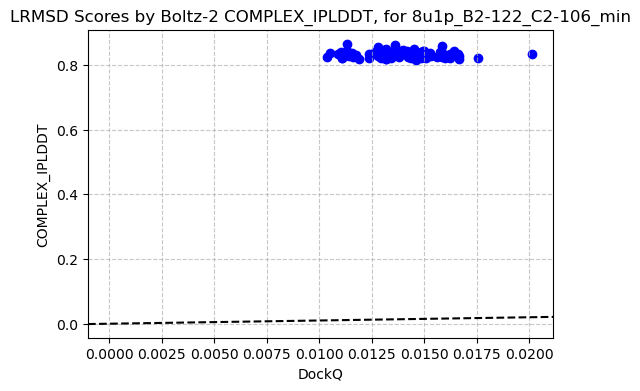

(0.8493574857711792, 0.881345808506012, 0.8177715539932251, 0.8298332095146179, 0.8601465225219727, 0.8250741362571716, 0.8689001202583313, 0.8862790465354919, 0.8895678520202637, 0.9100403785705566, 0.856425404548645, 0.8473650217056274, 0.8202603459358215, 0.8608142733573914, 0.8327898979187012, 0.8344572186470032, 0.8800125122070312, 0.9063360095024109, 0.8654811978340149, 0.8229708075523376, 0.8845836520195007, 0.844505786895752, 0.8158058524131775, 0.8569737672805786, 0.8870559334754944, 0.8452834486961365, 0.8450449705123901, 0.8522563576698303, 0.8335311412811279, 0.830647885799408, 0.8422712087631226, 0.9051274657249451, 0.8595927953720093, 0.8878987431526184, 0.8536043763160706, 0.8405640721321106, 0.896601140499115, 0.8427676558494568, 0.8840113878250122, 0.8407970666885376, 0.9061285257339478, 0.9114730954170227, 0.8419209122657776, 0.8422905206680298, 0.8143278360366821, 0.9060221910476685, 0.8168624043464661, 0.8743413686752319, 0.8479887843132019, 0.8446318507194519, 0.89

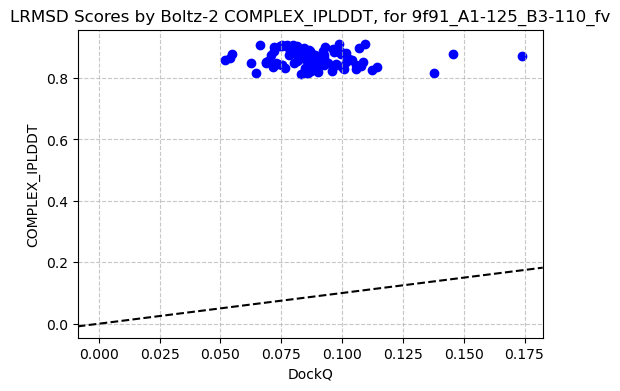

(0.8514329791069031, 0.8874391913414001, 0.8811729550361633, 0.8821849822998047, 0.8893059492111206, 0.8847107887268066, 0.8953102231025696, 0.8773864507675171, 0.8487420082092285, 0.8861729502677917, 0.8825927376747131, 0.8758212924003601, 0.886346161365509, 0.8699575066566467, 0.8827617764472961, 0.8619542121887207, 0.8655577898025513, 0.8590256571769714, 0.8535711765289307, 0.8475133180618286, 0.8787769079208374, 0.8649628162384033, 0.8522326350212097, 0.873723030090332, 0.8671879172325134, 0.8768320083618164, 0.8863489627838135, 0.8800411224365234, 0.8754844665527344, 0.8758477568626404, 0.8791595697402954, 0.8670434951782227, 0.88628751039505, 0.8729956150054932, 0.8766152262687683, 0.8803487420082092, 0.8660513758659363, 0.8828527927398682, 0.8800384402275085, 0.8870366215705872, 0.8727614283561707, 0.8803088665008545, 0.86356121301651, 0.8727808594703674, 0.8849928379058838, 0.8907464742660522, 0.8802064657211304, 0.881453812122345, 0.8763110041618347, 0.8834986686706543, 0.8708

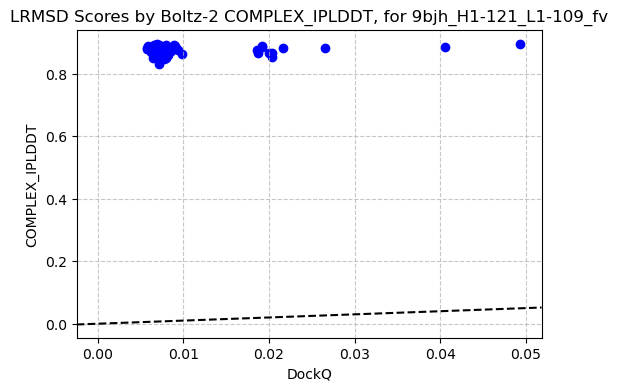

In [3]:
import os
import importlib.resources as files
import incito_pipeline.util.dockq_utility as dqu
import incito_pipeline.util.plotting as pl

#DATASET_PATH = files("incito_pipeline.datasets")

score_type = 'complex_iplddt'  # or 'ptm', depending on your preference

PATH_TO_GT_VHHS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/sample_pdb_sorted/vhhs")

PATH_TO_VHHS_PREDICTIONS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_sep/vhhs")
PATH_TO_VHHS_BOLTZ_OUTPUT = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions")


result_vhhs = dqu.score_all_by_iptm_dockq_nested(PATH_TO_GT_VHHS_PDBS,
                                                PATH_TO_VHHS_PREDICTIONS_PDBS,
                                                PATH_TO_VHHS_BOLTZ_OUTPUT,
                                                cache_name=None,
                                                score_type=score_type)

PATH_TO_GT_FV_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/sample_pdb_sorted/fv")

PATH_TO_FV_PREDICTIONS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_sep/fv")
PATH_TO_FV_BOLTZ_OUTPUT = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions")


result_fv = dqu.score_all_by_iptm_dockq_nested(PATH_TO_GT_FV_PDBS,
                                                PATH_TO_FV_PREDICTIONS_PDBS,
                                                PATH_TO_FV_BOLTZ_OUTPUT,
                                                cache_name=None,
                                                score_type=score_type)

merged = result_vhhs + result_fv
full_res, dockq, conf_scores = zip(*merged)

print(full_res)

x_data = []
y_data = []

for i, (full_res, dockq, conf_score_pair) in enumerate(merged):
    file_paths, scores = zip(*conf_score_pair.items())
    print(full_res[i])
    y_data += list(scores)

    for full_res_i in full_res[i]:
        print(full_res_i)
        x_data.append(dockq)
        #x_data.append(full_res_i['AB']['LRMSD'])
    
pl.plot_scatter_plot(x_data, y_data,
                     title=f"DockQ vs {score_type.upper()}",
                     x_label="DockQ Scores",
                     y_label=f"{score_type.upper()}",)



for i, (full_res, dockq, conf_score_pair) in enumerate(merged):
    file_paths, score = zip(*conf_score_pair.items())
    print(score)
    #dq = [f['AB']['LRMSD'] for f in full_res[i]]

    pairing = {}
    #for i, path in enumerate(file_paths):
    #    pairing[path] = dq[i]

    # Sort by value descending
    sorted_pairing = sorted(pairing.items(), key=lambda x: x[1], reverse=True)

    print(sorted_pairing)


    file_name = os.path.basename(file_paths[0]).split('confidence_')[-1].split('_combined_model')[0]

    print(score)
    #print(dq)

    pl.plot_scatter_plot(dockq, score,
                         title=f"LRMSD Scores by Boltz-2 {score_type.upper()}, for {file_name}",
                         x_label="DockQ",
                         y_label=f"{score_type.upper()}",)


In [1]:
import os
import importlib.resources as files
import incito_pipeline.util.dockq_utility as dqu
import incito_pipeline.util.plotting as pl

#DATASET_PATH = files("incito_pipeline.datasets")

scoring_method = 'complex_iplddt'  # or 'ptm' if you want to use PTM instead of IPTM

PATH_TO_GT_VHHS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/sample_pdb_sorted/vhhs")

PATH_TO_VHHS_PREDICTIONS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_sep/vhhs")
PATH_TO_VHHS_BOLTZ_OUTPUT = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions")

result_vhhs = dqu.score_highest_confidence_by_dockq(PATH_TO_GT_VHHS_PDBS,
                                                PATH_TO_VHHS_PREDICTIONS_PDBS,
                                                PATH_TO_VHHS_BOLTZ_OUTPUT,
                                                cache_name=None,
                                                score_type=scoring_method)

PATH_TO_GT_FV_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/sample_pdb_sorted/fv")

PATH_TO_FV_PREDICTIONS_PDBS = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output_converted_pdbs/no_template_sep/fv")
PATH_TO_FV_BOLTZ_OUTPUT = os.path.join(DATASET_PATH, "out/sample_run_20/boltz_output/boltz_results_sample_fastas/predictions")

result_fv = dqu.score_highest_confidence_by_dockq(PATH_TO_GT_FV_PDBS,
                                                PATH_TO_FV_PREDICTIONS_PDBS,
                                                PATH_TO_FV_BOLTZ_OUTPUT,
                                                cache_name=None,
                                                score_type=scoring_method)
merged = result_vhhs + result_fv
full_res, dockq, conf_scores = zip(*merged)

print(len(conf_scores))
print(len(dockq))

x_data = []
y_data = []

for i, score in enumerate(conf_scores):
    print(f"IPTM: {score}, DockQ: {dockq[i][0]}")
    x_data += list(dockq[i])
    y_data.append(score)

pl.plot_scatter_plot(x_data, y_data,
                     title=f"Top DockQ Scores vs {scoring_method.upper()}",
                     x_label="DockQ Scores",
                     y_label=scoring_method.upper(),)



/spinning1/scratch/cp864/miniforge3/envs/incito-py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'DATASET_PATH' is not defined

In [1]:
import incito_pipeline.util.parse.yaml_parse as yaml_parse
import incito_pipeline.util.dockq_utility as dqu

import incito_pipeline.util.parse.pdb as pdb_extract

yaml_parse.create_yaml_with_retrieved_epitopes("/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/7ox1_A1-127_B2-110.pdb", 
                                    "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/epitope_docking/yaml_files")


pdb_extract.convert_pdb_from_cif("/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/epitope_docking/boltz_out/boltz_results_7ox1_A1-127_B2-110/predictions/7ox1_A1-127_B2-110/7ox1_A1-127_B2-110_model_0.cif",
                                 "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/epitope_docking/pdb_preds/out.pdb")



#dqu.get_dockq_score("/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/7ox1_A1-127_B2-110.pdb",
#                    "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/out/epitope_docking/pdb_preds/out.pdb",
#                    chain_map=None)


/spinning1/scratch/cp864/miniforge3/envs/incito-pipeline/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


extracting epitopes
epitope_residue(chain_id='H', residue_number=38)
epitope_residue(chain_id='H', residue_number=57)
epitope_residue(chain_id='H', residue_number=58)
epitope_residue(chain_id='H', residue_number=58)
epitope_residue(chain_id='H', residue_number=59)
epitope_residue(chain_id='H', residue_number=59)
epitope_residue(chain_id='H', residue_number=59)
epitope_residue(chain_id='H', residue_number=60)
epitope_residue(chain_id='H', residue_number=60)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=65)
epitope_residue(chain_id='H', residue_number=66)
epitope_residue(chain_id='H', residue_number=66)
epitope_residue(chain_id='H', residue_number=66)
